<a href="https://colab.research.google.com/github/jaikishan2020/DAT8/blob/master/JAIKISHAN_Adv_DL_Project_Facial_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title -**Perform Facial Recognition with Deep Learning in Keras Using CNN**

**Project Scope:**

Develop a Face recognition programme with deep convolution network to perform facial recognition using Keras library. Improve the model accuracy with Iterations 

**Data set:**
The given data is in the form of .npz file which has four files.TrainX and Trainy and Test (X and y). The image array is given in X files and the labels in y files. There are total 400 images of size 112 x 92 for 20 people.

**Approach for the Solution:**

1)Load the data in .npz format.In this notebook the data is loaded to google drive and the notebook is executed by mounting the drive with the path of the data location.

2)Check the size of the data and the labels to understand the data set. Print the image which are a gray scale (single channel) to view the image.Understand the ditribution of the labels in y(train and test)

3)During data preprocessing ,scale the X features and reshape to the size given in the project details for feeding the model.

4) Prepare the CNN model with the three successive layers of Convolution,maxpooling and relu activation, further flattening and Three dense layers and finally an output layer with 20 classes and softmax activation.

5)Model is compiled using Adam optimizer and categorical_crossentropy loss function.

6)Initially fit with hyperparameters of 100 epochs, batch size of 20 ,Learning rate of 0.001

6) After fitting the model and understanding the accuracy ,the model architecture is slightly changed by adding drop out as well as change of hyperparameters in epochs to 50 and batchsize as 10.

7) On understand the accuracy obtained grid search is employed by maintaining the previous model architecture but with the hyperparmeters like no of epochs,batch size and learning rate to find out the best commbination of hypeparmeters.

8) This model is used for evaluation on the test data and treated as final model for deployment

9) The execution was done using GOOGLE COLAB.




In [105]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [106]:
data_npz=np.load('/content/drive/MyDrive/ORL_faces.npz')

In [107]:
for k,v in data_npz.items():
  print(k,v)

testY [ 0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14
 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19]
testX [[ 41.  47.  47. ...  35.  37.  38.]
 [ 44.  43.  32. ...  43.  43.  37.]
 [ 42.  41.  44. ...  42.  43.  41.]
 ...
 [101. 100. 103. ...  31.  40.  42.]
 [105. 108. 106. ...  44.  40.  47.]
 [113. 114. 111. ...  62.  81.  89.]]
trainX [[ 48.  49.  45. ...  47.  46.  46.]
 [ 60.  60.  62. ...  32.  34.  34.]
 [ 39.  44.  53. ...  29.  26.  29.]
 ...
 [114. 117. 114. ...  98.  96.  98.]
 [105. 105. 107. ...  54.  47.  41.]
 [116. 114. 117. ...  95. 100. 101.]]
trainY [ 0  0  0  0  0  0  0  0  0  0

In [108]:
X_train=data_npz.f.trainX
X_test=data_npz.f.testX
y_train=data_npz.f.trainY
y_test=data_npz.f.testY

In [109]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 10304)
(160, 10304)
(240,)
(160,)


In [110]:
print(np.unique(y_train))
print(np.unique(y_test))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [111]:
np.bincount(y_train)

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12])

In [112]:
# Understand the balancing of the data sets provided for training and testing from the respective label arrays
no_labels=np.unique(y_train)

for label,count in zip(no_labels,np.bincount(y_train)):
  print(" Count of label {} is {} records in the training set".format(label,count))

for label,count in zip(no_labels,np.bincount(y_test)):
  print(" Count of label {} is {} records in the testing set".format(label,count))



 Count of label 0 is 12 records in the training set
 Count of label 1 is 12 records in the training set
 Count of label 2 is 12 records in the training set
 Count of label 3 is 12 records in the training set
 Count of label 4 is 12 records in the training set
 Count of label 5 is 12 records in the training set
 Count of label 6 is 12 records in the training set
 Count of label 7 is 12 records in the training set
 Count of label 8 is 12 records in the training set
 Count of label 9 is 12 records in the training set
 Count of label 10 is 12 records in the training set
 Count of label 11 is 12 records in the training set
 Count of label 12 is 12 records in the training set
 Count of label 13 is 12 records in the training set
 Count of label 14 is 12 records in the training set
 Count of label 15 is 12 records in the training set
 Count of label 16 is 12 records in the training set
 Count of label 17 is 12 records in the training set
 Count of label 18 is 12 records in the training set
 Co

In [113]:
# create a function for displaying an image and a label of one record
def ShowImage(array_x,array_y):
  plt.imshow(array_x.reshape(112,92))
  plt.title('Picture of : {}'.format(array_y))
  plt.show()

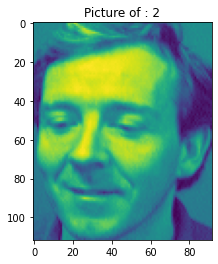

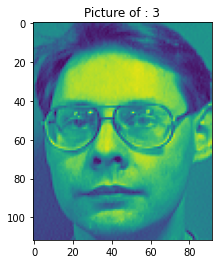

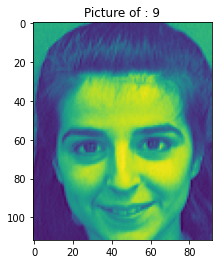

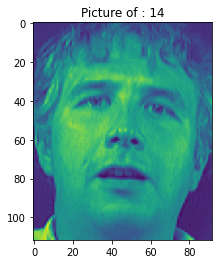

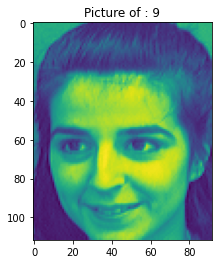

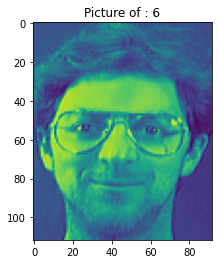

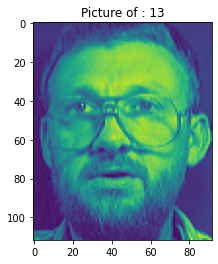

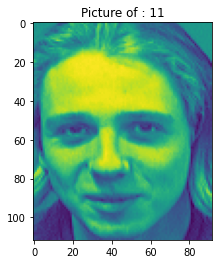

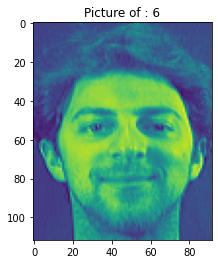

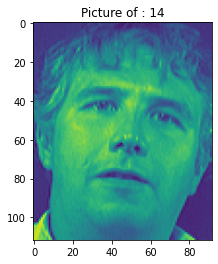

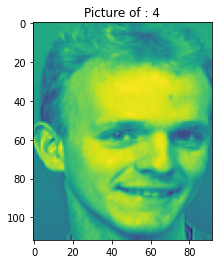

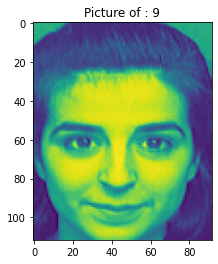

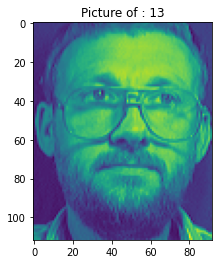

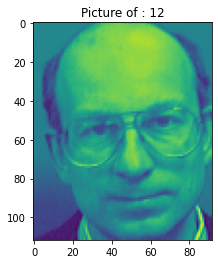

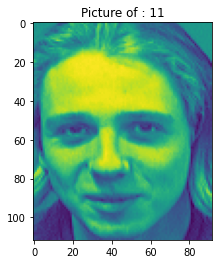

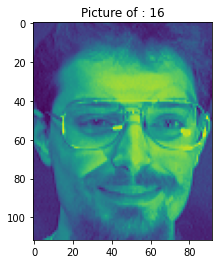

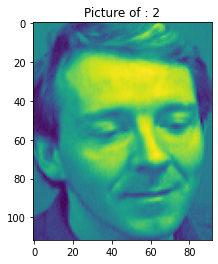

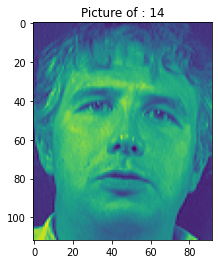

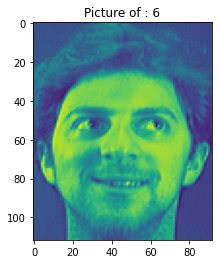

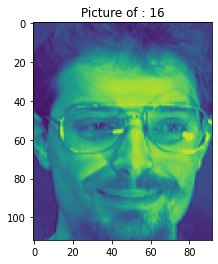

In [114]:
# Display some sample images by randomly generating the same along with the label
sample =np.random.randint(200,size=20)
for i in sample:
  ShowImage(X_train[i],y_train[i])



In [115]:
img_shape=(112,92,1)  # As per size given in the project outline


In [116]:
X_train.shape

(240, 10304)

In [117]:
X_train=X_train.reshape(X_train.shape[0],*img_shape)
X_test=X_test.reshape(X_test.shape[0],*img_shape)


In [118]:
print(X_train.shape)
print(X_test.shape)

(240, 112, 92, 1)
(160, 112, 92, 1)


In [119]:
# Scale the array values between 0 to 1
X_train=X_train/255.0
X_test=X_test/255.0

In [120]:
# Convert the single value label to one hot encoding vector for being compatible with the model
y_train = tf.keras.utils.to_categorical(y_train, 20)
y_test = tf.keras.utils.to_categorical(y_test, 20)

In [121]:
# Understand the one hot encoded form
print('Sample of One hot encloded labels of train : ',y_train[100])

print('Sample of One hot encloded labels of test :',y_test[100])

Sample of One hot encloded labels of train :  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sample of One hot encloded labels of test : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [122]:
# Network training parameters
EPOCHS = 100
BATCH_SIZE = 20
VERBOSE = 1
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.001)
lr=0.001

INPUT_SHAPE = img_shape
NB_CLASSES = 20 # number of outputs = number of digits (as observed in the np.unique of y_train and y_test)

In [123]:
# Architect your CNN model1
model1=tf.keras.models.Sequential()
model1.add(tf.keras.layers.Conv2D(128,(3,3),input_shape=img_shape,activation='relu',padding='same',strides=(1,1)))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same',strides=(1,1)))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same',strides=(1,1)))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu',padding='same',strides=(1,1)))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(units=512,activation='relu'))
model1.add(tf.keras.layers.Dense(units=256,activation='relu'))
model1.add(tf.keras.layers.Dense(units=128,activation='relu'))
model1.add(tf.keras.layers.Dense(units=NB_CLASSES,activation='softmax'))



In [124]:
model1.summary()

Model: "sequential_524"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2096 (Conv2D)         (None, 112, 92, 128)      1280      
_________________________________________________________________
max_pooling2d_2096 (MaxPooli (None, 56, 46, 128)       0         
_________________________________________________________________
conv2d_2097 (Conv2D)         (None, 56, 46, 64)        73792     
_________________________________________________________________
max_pooling2d_2097 (MaxPooli (None, 28, 23, 64)        0         
_________________________________________________________________
conv2d_2098 (Conv2D)         (None, 28, 23, 32)        18464     
_________________________________________________________________
max_pooling2d_2098 (MaxPooli (None, 14, 11, 32)        0         
_________________________________________________________________
conv2d_2099 (Conv2D)         (None, 14, 11, 16)     

In [125]:
# Compile model1

model1.compile(optimizer=OPTIMIZER,metrics='accuracy',loss='categorical_crossentropy')

In [126]:
# Fit the model1

history1=model1.fit(x=X_train,y=y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,
          steps_per_epoch=X_train.shape[0]//BATCH_SIZE,
          validation_data=(X_test,y_test),
          validation_steps=X_test.shape[0]//BATCH_SIZE,
          verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 45ms/step - loss: 3.0003 - accuracy: 0.0393 - val_loss: 2.9923 - val_accuracy: 0.1312
Epoch 2/100
12/12 [==============================] - 0s 27ms/step - loss: 2.9873 - accuracy: 0.1210 - val_loss: 2.9318 - val_accuracy: 0.1562
Epoch 3/100
12/12 [==============================] - 0s 26ms/step - loss: 2.8485 - accuracy: 0.1890 - val_loss: 2.3707 - val_accuracy: 0.2688
Epoch 4/100
12/12 [==============================] - 0s 26ms/step - loss: 2.1277 - accuracy: 0.3690 - val_loss: 1.5293 - val_accuracy: 0.5750
Epoch 5/100
12/12 [==============================] - 0s 26ms/step - loss: 1.2613 - accuracy: 0.6259 - val_loss: 0.7490 - val_accuracy: 0.7188
Epoch 6/100
12/12 [==============================] - 0s 26ms/step - loss: 0.5214 - accuracy: 0.8248 - val_loss: 0.7813 - val_accuracy: 0.7312
Epoch 7/100
12/12 [==============================] - 0s 26ms/step - loss: 0.3998 - accuracy: 0.8546 - val_loss: 0.6249 - val_accuracy: 0.8188
Epoch 

In [127]:
# Build a function to understand the changes in the Loss and Accuracy as the Epochs progresses
def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, len(history.epoch) + 1)

    plt.plot(e, metric, color='blue', label='Train ' + metric_name)
    plt.plot(e, val_metric, color='orange', label='Validation ' + metric_name)
    plt.legend()
    plt.grid()
    plt.show()

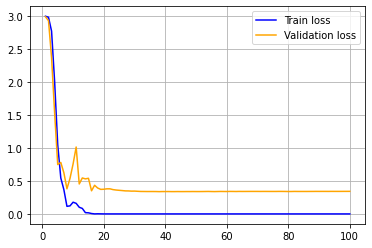

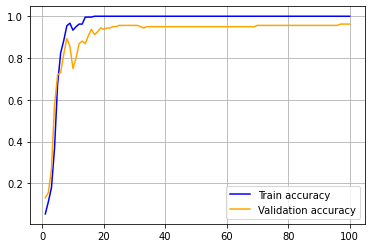

In [128]:
# Use the function created to plot the loss and the accuracy with respect to the progress of the Epochs
eval_metric(history1,'loss')
eval_metric(history1,'accuracy')

After 100 epochs for this model architecture and hyper parameters the validation accuracy is tanked at 96.25% and hence alternate options to be explored in model2

We need to try the following changes to the next mode (model2): 

1.   Add dropout of 0.2 (20%)
2.   Reduce the batch size to 10 
3.   Reduce the Number of epochs to 50













In [129]:
# Network training parameters
EPOCHS = 50  # During the previous fit validation accuracy started to be stable from epoch no 22 and hence number of epochs is reduced this time.
BATCH_SIZE = 10
VERBOSE = 1
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.001)
lr=0.001

INPUT_SHAPE = img_shape
NB_CLASSES = 20 # number of outputs = number of digits

In [130]:
# Import the required additional dependencies for building the revised model
from keras import regularizers
from keras.layers import Dropout

In [131]:
# Architect your CNN model with drop outs and regularisers and maintain remaining structure as same
model2=tf.keras.models.Sequential()
model2.add(tf.keras.layers.Conv2D(128,(3,3),input_shape=img_shape,activation='relu',padding='same',strides=(1,1)))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same',strides=(1,1)))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same',strides=(1,1)))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu',padding='same',strides=(1,1)))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(units=512,activation='relu'))
model2.add(Dropout(rate=0.2))
model2.add(tf.keras.layers.Dense(units=256,activation='relu'))
model2.add(Dropout(rate=0.2))
model2.add(tf.keras.layers.Dense(units=128,activation='relu'))
model2.add(Dropout(rate=0.2))
model2.add(tf.keras.layers.Dense(units=NB_CLASSES,activation='softmax'))

In [132]:
# Compile model2

model2.compile(optimizer=OPTIMIZER,metrics='accuracy',loss='categorical_crossentropy')

In [133]:
# Fit the model2

history2=model2.fit(x=X_train,y=y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,
                    steps_per_epoch=X_train.shape[0]//BATCH_SIZE,
                    validation_data=(X_test,y_test),
                    validation_steps=X_test.shape[0]//BATCH_SIZE,
                    verbose=1)

Epoch 1/50
24/24 [==============================] - 1s 25ms/step - loss: 3.0135 - accuracy: 0.0660 - val_loss: 2.9951 - val_accuracy: 0.0500
Epoch 2/50
24/24 [==============================] - 0s 15ms/step - loss: 2.9961 - accuracy: 0.0309 - val_loss: 2.9931 - val_accuracy: 0.0500
Epoch 3/50
24/24 [==============================] - 0s 15ms/step - loss: 2.9928 - accuracy: 0.0205 - val_loss: 2.9703 - val_accuracy: 0.1000
Epoch 4/50
24/24 [==============================] - 0s 15ms/step - loss: 2.9493 - accuracy: 0.1055 - val_loss: 2.6272 - val_accuracy: 0.2750
Epoch 5/50
24/24 [==============================] - 0s 15ms/step - loss: 2.5013 - accuracy: 0.1870 - val_loss: 1.8330 - val_accuracy: 0.3000
Epoch 6/50
24/24 [==============================] - 0s 14ms/step - loss: 1.9107 - accuracy: 0.4075 - val_loss: 1.2975 - val_accuracy: 0.5375
Epoch 7/50
24/24 [==============================] - 0s 15ms/step - loss: 1.2198 - accuracy: 0.5639 - val_loss: 0.7400 - val_accuracy: 0.8188
Epoch 8/50
24

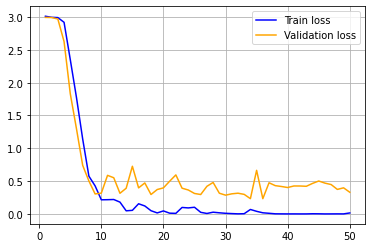

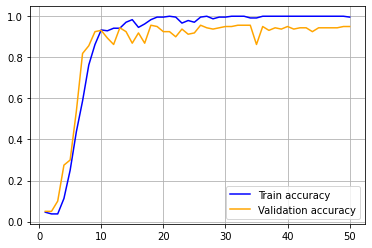

In [135]:
# Use the function created to plot the loss and the accuracy with respect to the progress of the Epochs
eval_metric(history2,'loss')
eval_metric(history2,'accuracy')

To further explore improvement in the accuracy metric , the same model2 Architecture is trained with combinations of Hyperparameters using GRID SEARCH by changing the following parameters


1.   Batch size
2.   Number of Epochs
2.   Learning rate of the Adam Optimizer


In [136]:
def create_model(learning_rate):
      	# create model
        model=tf.keras.models.Sequential()
        model.add(tf.keras.layers.Conv2D(128,(3,3),input_shape=img_shape,activation='relu',padding='same',strides=(1,1)))
        model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
        model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same',strides=(1,1)))
        model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
        model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same',strides=(1,1)))
        model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
        model.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu',padding='same',strides=(1,1)))
        model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(units=512,activation='relu'))
        model.add(Dropout(rate=0.2))
        model.add(tf.keras.layers.Dense(units=256,activation='relu'))
        model.add(Dropout(rate=0.2))
        model.add(tf.keras.layers.Dense(units=128,activation='relu'))
        model.add(Dropout(rate=0.2))
        model.add(tf.keras.layers.Dense(units=NB_CLASSES,activation='softmax'))
        # Fix optimizer parameters
        OPTIMIZER = tf.keras.optimizers.Adam(learning_rate)
        # Compile model
        model.compile(optimizer=OPTIMIZER,loss='categorical_crossentropy',metrics='accuracy')
        return model


In [137]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [138]:
model3=KerasClassifier(build_fn=create_model,verbose=1)

In [139]:
param_grid=dict(epochs=[25,50,75],batch_size=[2,5,10],learning_rate=[0.0001,0.0005,0.001,0.01])

In [140]:
# Use the Grid search CV with the param_grid containing the various combination of hyperperameters and 8 fold cross validation
grid=GridSearchCV(estimator=model3,param_grid=param_grid, cv=8,verbose=3)

In [141]:
grid_result = grid.fit(X_train, y_train)

Fitting 8 folds for each of 36 candidates, totalling 288 fits
[CV] batch_size=2, epochs=25, learning_rate=0.0001 ...................
Epoch 1/25


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


105/105 [==============================] - 1s 4ms/step - loss: 2.9985 - accuracy: 0.0748
Epoch 2/25
105/105 [==============================] - 0s 4ms/step - loss: 2.9824 - accuracy: 0.0811
Epoch 3/25
105/105 [==============================] - 0s 4ms/step - loss: 2.9527 - accuracy: 0.0458
Epoch 4/25
105/105 [==============================] - 0s 4ms/step - loss: 2.9352 - accuracy: 0.0559
Epoch 5/25
105/105 [==============================] - 0s 4ms/step - loss: 2.8767 - accuracy: 0.0544
Epoch 6/25
105/105 [==============================] - 0s 4ms/step - loss: 2.7491 - accuracy: 0.1361
Epoch 7/25
105/105 [==============================] - 0s 4ms/step - loss: 2.3996 - accuracy: 0.2130
Epoch 8/25
105/105 [==============================] - 0s 4ms/step - loss: 1.7708 - accuracy: 0.4157
Epoch 9/25
105/105 [==============================] - 0s 4ms/step - loss: 1.3831 - accuracy: 0.5742
Epoch 10/25
105/105 [==============================] - 0s 4ms/step - loss: 1.1255 - accuracy: 0.6511
Epoch 11/2

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s


105/105 [==============================] - 1s 4ms/step - loss: 2.9970 - accuracy: 0.0861
Epoch 2/25
105/105 [==============================] - 0s 4ms/step - loss: 2.9817 - accuracy: 0.0678
Epoch 3/25
105/105 [==============================] - 0s 4ms/step - loss: 2.9569 - accuracy: 0.1064
Epoch 4/25
105/105 [==============================] - 0s 4ms/step - loss: 2.9119 - accuracy: 0.0817
Epoch 5/25
105/105 [==============================] - 0s 4ms/step - loss: 2.8096 - accuracy: 0.0860
Epoch 6/25
105/105 [==============================] - 0s 4ms/step - loss: 2.5209 - accuracy: 0.2043
Epoch 7/25
105/105 [==============================] - 0s 4ms/step - loss: 2.2271 - accuracy: 0.2391
Epoch 8/25
105/105 [==============================] - 0s 4ms/step - loss: 1.7408 - accuracy: 0.4269
Epoch 9/25
105/105 [==============================] - 0s 4ms/step - loss: 1.3944 - accuracy: 0.5565
Epoch 10/25
105/105 [==============================] - 0s 4ms/step - loss: 1.0044 - accuracy: 0.7112
Epoch 11/2

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.1s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
21/21 [==============================] - 0s 12ms/step - loss: 2.8825 - accuracy: 0.0204
Epoch 17/50
21/21 [==============================] - 0s 12ms/step - loss: 2.8971 - accuracy: 0.0421
Epoch 18/50
21/21 [==============================] - 0s 12ms/step - loss: 2.8904 - accuracy: 0.0166
Epoch 19/50
21/21 [==============================] - 0s 13ms/step - loss: 2.8842 - accuracy: 0.0391
Epoch 20/50
21/21 [==============================] - 0s 11ms/step - loss: 2.8938 - accuracy: 0.0433
Epoch 21/50
21/21 [==============================] - 0s 12ms/step - loss: 2.8927 - accuracy: 0.1054
Epoch 22/50
21/21 [==============================] - 0s 12ms/step - loss: 2.8873 - accuracy: 0.0684
Epoch 23/50
21/21 [==============================] - 0s 12ms/step - loss: 2.8811 - accuracy: 0.0476
Epoch 24/50
21/21 [==============================] - 0s 12ms/step - loss: 2.8930 - accuracy: 0.0549
Epoch 25/50
21/21 [==============================] - 0s 12ms/

[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 94.9min finished


Epoch 1/50
48/48 [==============================] - 1s 8ms/step - loss: 2.9998 - accuracy: 0.0746
Epoch 2/50
48/48 [==============================] - 0s 6ms/step - loss: 2.9951 - accuracy: 0.0511
Epoch 3/50
48/48 [==============================] - 0s 7ms/step - loss: 2.9952 - accuracy: 0.0578
Epoch 4/50
48/48 [==============================] - 0s 7ms/step - loss: 2.9871 - accuracy: 0.0678
Epoch 5/50
48/48 [==============================] - 0s 7ms/step - loss: 2.9446 - accuracy: 0.1046
Epoch 6/50
48/48 [==============================] - 0s 7ms/step - loss: 2.3586 - accuracy: 0.2083
Epoch 7/50
48/48 [==============================] - 0s 8ms/step - loss: 1.7086 - accuracy: 0.4471
Epoch 8/50
48/48 [==============================] - 0s 8ms/step - loss: 1.1641 - accuracy: 0.6511
Epoch 9/50
48/48 [==============================] - 0s 8ms/step - loss: 0.4658 - accuracy: 0.8708
Epoch 10/50
48/48 [==============================] - 0s 8ms/step - loss: 0.4019 - accuracy: 0.8164
Epoch 11/50
48/48 [

In [142]:
grid_result.param_grid

{'batch_size': [2, 5, 10],
 'epochs': [25, 50, 75],
 'learning_rate': [0.0001, 0.0005, 0.001, 0.01]}

In [143]:
grid_result.best_params_

{'batch_size': 5, 'epochs': 50, 'learning_rate': 0.0005}

In [144]:
grid_result.score

<bound method BaseSearchCV.score of GridSearchCV(cv=8, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f7a98170890>,
             iid='deprecated', n_jobs=None,
             param_grid={'batch_size': [2, 5, 10], 'epochs': [25, 50, 75],
                         'learning_rate': [0.0001, 0.0005, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)>

In [145]:
grid_result.cv_results_

{'mean_fit_time': array([11.44252288, 11.81694928, 12.47025007, 12.95626813, 26.7378197 ,
        27.91277194, 29.15681714, 29.94574642, 45.44092935, 45.29720515,
        45.1904847 , 45.55541164,  8.51718697,  8.49293807,  8.4986217 ,
         8.34778824, 16.30730644, 16.37469009, 16.16013262, 16.13010094,
        24.45500723, 24.44063321, 24.15886864, 23.94138393,  7.09546345,
         7.05116624,  7.01468396,  7.01682517, 13.49496189, 13.578787  ,
        13.3807545 , 13.82421178, 20.31083238, 20.21149474, 20.29879859,
        20.16648588]),
 'mean_score_time': array([0.20678151, 0.2062543 , 0.20976809, 0.21477565, 0.22226512,
        0.26587886, 0.237609  , 0.22923681, 0.28019863, 0.2378833 ,
        0.24525994, 0.24103343, 0.21151802, 0.2120693 , 0.20992956,
        0.26039937, 0.21437541, 0.22171444, 0.24928236, 0.2259413 ,
        0.21477559, 0.21738499, 0.21262828, 0.21585822, 0.20938987,
        0.21761084, 0.2410067 , 0.25496265, 0.31696108, 0.25783822,
        0.26246929, 0.

In [146]:
# summarizing the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.145833 using {'batch_size': 5, 'epochs': 50, 'learning_rate': 0.0005}


In [147]:
# Fix the best hyper parameters and build the final model
EPOCHS_FINAL=50
BATCH_SIZE_FINAL=5
learning_rate_final=0.0005

In [148]:
# create final model(retaining the previous model architecture)
model4=tf.keras.models.Sequential()
model4.add(tf.keras.layers.Conv2D(128,(3,3),input_shape=img_shape,activation='relu',padding='same',strides=(1,1)))
model4.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model4.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same',strides=(1,1)))
model4.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model4.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same',strides=(1,1)))
model4.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model4.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu',padding='same',strides=(1,1)))
model4.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(units=512,activation='relu'))
model4.add(Dropout(rate=0.2))
model4.add(tf.keras.layers.Dense(units=256,activation='relu'))
model4.add(Dropout(rate=0.2))
model4.add(tf.keras.layers.Dense(units=128,activation='relu'))
model4.add(Dropout(rate=0.2))
model4.add(tf.keras.layers.Dense(units=NB_CLASSES,activation='softmax'))

In [149]:
# Fix optimizer parameters
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate_final)

In [150]:
# Compile model
model4.compile(optimizer=OPTIMIZER,loss='categorical_crossentropy',metrics='accuracy')

In [151]:
history4=model4.fit(x=X_train,y=y_train,batch_size=BATCH_SIZE_FINAL,epochs=EPOCHS_FINAL,
                    steps_per_epoch=X_train.shape[0]//BATCH_SIZE_FINAL,
                    validation_data=(X_test,y_test),
                    validation_steps=X_test.shape[0]//BATCH_SIZE_FINAL,
                    verbose=1)

Epoch 1/50
48/48 [==============================] - 2s 15ms/step - loss: 3.0115 - accuracy: 0.0649 - val_loss: 2.9944 - val_accuracy: 0.0688
Epoch 2/50
48/48 [==============================] - 0s 9ms/step - loss: 2.9957 - accuracy: 0.0347 - val_loss: 2.9946 - val_accuracy: 0.0500
Epoch 3/50
48/48 [==============================] - 0s 9ms/step - loss: 2.9966 - accuracy: 0.0340 - val_loss: 2.9899 - val_accuracy: 0.0625
Epoch 4/50
48/48 [==============================] - 0s 9ms/step - loss: 2.9874 - accuracy: 0.0557 - val_loss: 2.9695 - val_accuracy: 0.2125
Epoch 5/50
48/48 [==============================] - 0s 9ms/step - loss: 2.8976 - accuracy: 0.1178 - val_loss: 2.0990 - val_accuracy: 0.2625
Epoch 6/50
48/48 [==============================] - 0s 8ms/step - loss: 1.9938 - accuracy: 0.3448 - val_loss: 1.3737 - val_accuracy: 0.4938
Epoch 7/50
48/48 [==============================] - 0s 9ms/step - loss: 1.3918 - accuracy: 0.5426 - val_loss: 0.7366 - val_accuracy: 0.6812
Epoch 8/50
48/48 [=

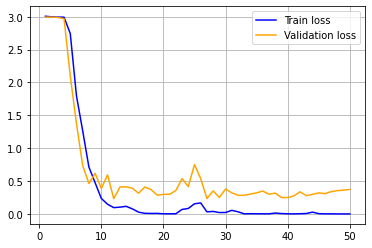

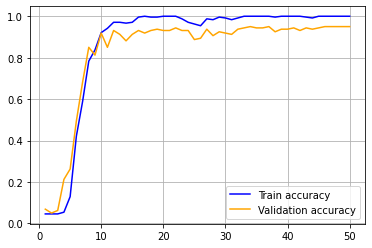

In [152]:
# Use the function created to plot the loss and the accuracy with respect to the progress of the Epochs
eval_metric(history4,'loss')
eval_metric(history4,'accuracy')

**Conclusion**

Based on the above outcome the model1 is found to have marginally better accuracy of 96.25 % .If we do further iterations with additonal combinations of hyperparameters like what is executed for model2 architecture, we may get a further improved model. Still 96.25 % is a respectable accuracy for face detection process.